As instituições financeiras incorrem em perdas significativas devido à inadimplência de empréstimos de veículos. Isso levou ao endurecimento da subscrição de empréstimos de veículos e ao aumento das taxas de rejeição de empréstimos de veículos. A necessidade de um melhor modelo de pontuação de risco de crédito também é levantada por essas instituições.

Isso justifica um estudo para estimar os determinantes da inadimplência de empréstimos de veículos. Uma instituição financeira contratou você para prever com precisão a probabilidade de o mutuário/mutuário inadimplir um empréstimo de veículo nas primeiras EMI (Prestações Mensais Equivalentes) na data de vencimento. As seguintes informações sobre o empréstimo e o mutuário são fornecidas nos conjuntos de dados:

Informações do mutuário (dados demográficos como idade, comprovante de identidade etc.)

Informações do empréstimo (detalhes de desembolso, relação empréstimo/valor etc.)

Dados e histórico do bureau (pontuação do bureau, número de contas ativas, status de outros empréstimos, histórico de crédito etc.)

Fazer isso garantirá que os clientes capazes de pagar não sejam rejeitados e determinantes importantes possam ser identificados, os quais podem ser usados ​​posteriormente para minimizar as taxas de inadimplência.

Nome da variável Descrição Sem nome: 2

0 UniqueID Identificador para clientes

1 loan_default Pagamento inadimplente no primeiro EMI na data de vencimento

2 disbursed_amount Valor do empréstimo desembolsado

3 asset_cost Custo do ativo

4 ltv Empréstimo para valor do ativo

5 branch_id Agência onde o empréstimo foi desembolsado

6 supplier_id Concessionária de veículos onde o empréstimo foi desembolsado

7 manufacturer_id Fabricante do veículo (Hero, Honda, TVS etc.)

8 Current_pincode Código PIN atual do cliente

9 Date.of.Birth Data de nascimento do cliente

10 Employment.Type Tipo de emprego do cliente (assalariado/autônomo)

11 DisbursalDate Data do desembolso

12 State_ID Estado do desembolso

13 Employee_code_ID Funcionário da organização que registrou o desembolso

14 MobileNo_Avl_Flag se o número do celular for foi compartilhado pelo cliente e então sinalizado como 1

15 Aadhar_flag se aadhar foi compartilhado pelo cliente e então sinalizado como 1

16 PAN_flag se pan foi compartilhado pelo cliente e então sinalizado como 1

17 VoterID_flag se voter foi compartilhado pelo cliente e então sinalizado como 1

18 Driving_flag se DL foi compartilhado pelo cliente e então sinalizado como 1

19 Passport_flag se passport foi compartilhado pelo cliente e então sinalizado como 1

20 PERFORM_CNS.SCORE Pontuação do Bureau

21 PERFORM_CNS.SCORE.DESCRIPTION Descrição da pontuação do Bureau

22 PRI.NO.OF.ACCTS contagem do total de empréstimos tomados pelo cliente no momento do desembolso As contas primárias são aquelas que o cliente tomou para seu uso pessoal

23 PRI.ACTIVE.ACCTS contagem de empréstimos ativos tomados pelo cliente no momento do desembolso

24 PRI.OVERDUE.ACCTS contagem de contas inadimplentes no momento do desembolso

25 PRI.CURRENT.BALANCE valor total do principal em aberto dos empréstimos ativos no momento do desembolso

26 PRI.SANCTIONED.AMOUNT valor total que foi sancionado para todos os empréstimos no momento do desembolso

27 PRI.DISBURSED.AMOUNT valor total que foi desembolsado para todos os empréstimos no momento do desembolso

28 SEC.NO.OF.ACCTS contagem do total de empréstimos tomados pelo cliente no momento do desembolso Contas secundárias são aquelas nas quais o cliente atua como co-solicitante ou garantidor

29 SEC.ACTIVE.ACCTS contagem de empréstimos ativos tomados pelo cliente no momento do desembolso

30 SEC.OVERDUE.ACCTS contagem de contas inadimplentes no momento do desembolso
31 SEC.CURRENT.BALANCE valor total do principal em aberto dos empréstimos ativos no momento do desembolso

32 SEC.SANCTIONED.AMOUNT valor total que foi sancionado para todos os empréstimos no momento do desembolso

33 SEC.DISBURSED.AMOUNT valor total que foi desembolsado para todos os empréstimos no momento do desembolso

34 PRIMARY.INSTAL.AMT EMI Valor do empréstimo principal

35 SEC.INSTAL.AMT EMI Valor do empréstimo secundário

36 NEW.ACCTS.IN.LAST.SIX.MONTHS Novos empréstimos tomados pelo cliente nos últimos 6 meses antes do desembolso

37 DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS Empréstimos inadimplentes nos últimos 6 meses

38 AVERAGE.ACCT.AGE Prazo médio do empréstimo

39 CREDIT.HISTORY.LENGTH Tempo desde o primeiro empréstimo

40 NO.OF_INQUIRIES Consultas feitas pelo cliente para empréstimos

In [6]:
!pip install deep-translator
!pip install ydata_profiling

In [7]:
from deep_translator import GoogleTranslator
import pandas as pd

# Exemplo de DataFrame
data = {'observation': [
    'This is a loan application',
    'The customer has a good credit history',
    'The payment is overdue'
]}
df = pd.DataFrame(data)

# Traduzir a coluna para português
df['observacao_pt'] = df['observation'].apply(lambda x: GoogleTranslator(source='en', target='pt').translate(x))

# Exibir o DataFrame com a nova coluna traduzida
print(df)


                              observation  \
0              This is a loan application   
1  The customer has a good credit history   
2                  The payment is overdue   

                               observacao_pt  
0             Este é um pedido de empréstimo  
1  O cliente tem um bom histórico de crédito  
2                  O pagamento está atrasado  


In [8]:
import pandas as pd
import plotly.express as px
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os

# Pasta onde você acredita que o arquivo está
folder_path = '/content/drive/My Drive/Colab Notebooks'

# Listar arquivos na pasta
print(os.listdir(folder_path))


['Notebooks', 'Projeto SPAM', 'CRM', 'Projeto Boston Housing', 'xx.old', 'Projeto MNIST - Classificar Imagens', 'score_credito', 'Cópia de Score_Credito.ipynb', 'Cópia de Cópia de Score_Credito.ipynb', 'Cópia de Cópia de Cópia de Score_Credito.ipynb', 'Cópia de Cópia de Cópia de Cópia de Score_Credito.ipynb']


In [11]:
import pandas as pd
# Ajustar o pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Caminho completo do arquivo no Google Drive GERAR LINK PUBLICO DA BASE NO DRIVE PARA AcESSO
file_path_test = '/content/drive/My Drive/Colab Notebooks/score_credito/loan-default/test.csv'
file_path_train = '/content/drive/My Drive/Colab Notebooks/score_credito/loan-default/train.csv'
file_path_dict = '/content/drive/My Drive/Colab Notebooks/score_credito/loan-default/data_dictionary.csv'

# Carregar o arquivo no DataFrame
loan_data_test  = pd.read_csv(file_path_test)
loan_data_train = pd.read_csv(file_path_train)
df_dict         = pd.read_csv(file_path_dict)

# Substituir pontos por underscores nos nomes das colunas
loan_data_test.columns  = loan_data_test.columns.str.replace(r'\.', '_', regex=True)
loan_data_train.columns = loan_data_train.columns.str.replace(r'\.', '_', regex=True)

# Concatenar
df =  loan_data_train#.set_index('UniqueID') # pd.concat([loan_data_test, loan_data_train], axis=0)

# Ajusta Dict das Vars
df_dict['Desc_Portugues'] = df_dict['Description'].apply(lambda x: GoogleTranslator(source='en', target='pt').translate(x))
df_dict['Variable Name'] = df_dict['Variable Name'].str.replace(r'\.', '_', regex=True)
df_dict = df_dict.loc[:,['Variable Name','Desc_Portugues']]

# Exibir as primeiras linhas do dataset
print(df.dtypes)
df.head(5)


UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date_of_Birth                           object
Employment_Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACC

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [12]:
# Visualisa Dict
df_dict

,Variable Name,Desc_Portugues
0,UniqueID,Identificador para clientes
1,loan_default,Inadimplência no primeiro EMI na data de venci...
2,disbursed_amount,Valor do empréstimo desembolsado
3,asset_cost,Custo do Ativo
4,ltv,Empréstimo para valor do ativo
5,branch_id,Agência onde o empréstimo foi desembolsado
6,supplier_id,Concessionária de veículos onde o empréstimo f...
7,manufacturer_id,"Fabricante de veículos (Hero, Honda, TVS etc.)"
8,Current_pincode,Código PIN atual do cliente
9,Date_of_Birth,Data de nascimento do cliente


# **Análise de IV & WOE**

In [13]:
import numpy as np

# Função para converter o formato 'Xyrs Ymon' em meses
def convert_to_months(history):
    # Verificar se o valor não é nulo e é uma string
    if isinstance(history, str):
        try:
            # Separar os componentes de anos e meses
            years, months = history.split(' ')
            years = int(years.replace('yrs', ''))  # Retirar 'yrs' e converter para inteiro
            months = int(months.replace('mon', ''))  # Retirar 'mon' e converter para inteiro

            # Calcular o total de meses
            total_months = years * 12 + months
            return total_months
        except ValueError:
            return np.nan  # Caso ocorra erro no formato
    return np.nan  # Se não for string, retornar np.nan

# Aplicar a função ao DataFrame
df['CREDIT_HISTORY_LENGTH'] = df['CREDIT_HISTORY_LENGTH'].apply(lambda x: convert_to_months(x))
df['AVERAGE_ACCT_AGE']      = df['AVERAGE_ACCT_AGE'].apply(lambda x: convert_to_months(x))

# **Tratativas Pontuais e Formato das Variáves**

In [14]:
dict_vars_formats = {
    'UniqueID': str,  # Identificador único
    'loan_default': int,  # Indicador de inadimplência (0/1)
    'disbursed_amount': float,  # Valor desembolsado
    'asset_cost': float,  # Custo do ativo
    'ltv': float,  # Loan-to-Value (relação do empréstimo com o valor do ativo)
    'branch_id': str,  # ID da agência
    'supplier_id': str,  # ID do fornecedor
    'manufacturer_id': str,  # ID do fabricante
    'Current_pincode': str,  # Código postal
    'Date_of_Birth': 'datetime64[ns]',  # Data de nascimento
    'Employment_Type': str,  # Tipo de emprego (ex.: "Salaried", "Self-employed")
    'DisbursalDate': 'datetime64[ns]',  # Data de desembolso
    'State_ID': str,  # ID do estado
    'Employee_code_ID': str,  # Código do funcionário
    'MobileNo_Avl_Flag': str,  # Flag para disponibilidade de número móvel
    'Aadhar_flag': str,  # Flag de Aadhar (documento de identificação na Índia)
    'PAN_flag': str,  # Flag de PAN (número de identificação fiscal na Índia)
    'VoterID_flag': str,  # Flag de Voter ID (identidade eleitoral)
    'Driving_flag': str,  # Flag de carteira de motorista
    'Passport_flag': str,  # Flag de passaporte
    'PERFORM_CNS_SCORE': int,  # Score CNS de desempenho
    'PERFORM_CNS_SCORE_DESCRIPTION': str,  # Descrição do score CNS
    'PRI_NO_OF_ACCTS': int,  # Número de contas principais
    'PRI_ACTIVE_ACCTS': int,  # Contas principais ativas
    'PRI_OVERDUE_ACCTS': int,  # Contas principais atrasadas
    'PRI_CURRENT_BALANCE': float,  # Saldo atual das contas principais
    'PRI_SANCTIONED_AMOUNT': float,  # Montante sancionado em contas principais
    'PRI_DISBURSED_AMOUNT': float,  # Montante desembolsado em contas principais
    'SEC_NO_OF_ACCTS': int,  # Número de contas secundárias
    'SEC_ACTIVE_ACCTS': int,  # Contas secundárias ativas
    'SEC_OVERDUE_ACCTS': int,  # Contas secundárias atrasadas
    'SEC_CURRENT_BALANCE': float,  # Saldo atual das contas secundárias
    'SEC_SANCTIONED_AMOUNT': float,  # Montante sancionado em contas secundárias
    'SEC_DISBURSED_AMOUNT': float,  # Montante desembolsado em contas secundárias
    'PRIMARY_INSTAL_AMT': float,  # Valor da parcela principal
    'SEC_INSTAL_AMT': float,  # Valor da parcela secundária
    'NEW_ACCTS_IN_LAST_SIX_MONTHS': int,  # Novas contas nos últimos 6 meses
    'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS': int,  # Contas inadimplentes nos últimos 6 meses
    'AVERAGE_ACCT_AGE': int,  # Idade média das contas (geralmente em formato "xY yM")
    'CREDIT_HISTORY_LENGTH': int,  # Duração do histórico de crédito (formato "xY yM")
    'NO_OF_INQUIRIES': int  # Número de consultas de crédito
}

# Ajusta Formatos
def ajustar_tipos(df, tipos_variaveis):
    df= df.copy()  # Garante que o DataFrame original não seja modificado
    for coluna, tipo in tipos_variaveis.items():
        if coluna in df.columns:
            if tipo == 'datetime64[ns]':  # Conversão para datas
                df[coluna] = pd.to_datetime(df[coluna], errors='coerce')
            else:
                try:
                    df[coluna] = df[coluna].astype(tipo)
                except Exception as e:
                    print(f"Erro ao converter coluna '{coluna}' para {tipo}: {e}")
    return df

# Aplicar o ajuste usando o dicionário `tipos_variaveis`
df = ajustar_tipos(df, dict_vars_formats)

# Verificar os tipos ajustados
print(df.dtypes)
df

<ipython-input-14-e70e68b5cd27>:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[coluna] = pd.to_datetime(df[coluna], errors='coerce')
<ipython-input-14-e70e68b5cd27>:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[coluna] = pd.to_datetime(df[coluna], errors='coerce')


UniqueID                                       object
disbursed_amount                              float64
asset_cost                                    float64
ltv                                           float64
branch_id                                      object
supplier_id                                    object
manufacturer_id                                object
Current_pincode_ID                              int64
Date_of_Birth                          datetime64[ns]
Employment_Type                                object
DisbursalDate                          datetime64[ns]
State_ID                                       object
Employee_code_ID                               object
MobileNo_Avl_Flag                              object
Aadhar_flag                                    object
PAN_flag                                       object
VoterID_flag                                   object
Driving_flag                                   object
Passport_flag               

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
0,420825,50578.0,58400.0,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,537409,47145.0,65550.0,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600.0,50200.0,50200.0,0,0,0,0.0,0.0,0.0,1991.0,0.0,0,1,23,23,0,1
2,417566,53278.0,61360.0,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-01-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,624493,57513.0,66113.0,88.48,67,22807,45,1501,1993-12-30,Self employed,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,31.0,0.0,0,0,8,15,1,1
4,539055,52378.0,60300.0,88.39,67,22807,45,1495,1977-09-12,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213.0,105405.0,60.72,34,20700,48,1050,1988-01-08,Salaried,2018-10-26,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443.0,416133.0,416133.0,0,0,0,0.0,0.0,0.0,4084.0,0.0,0,0,21,39,0,0
233150,606141,73651.0,100600.0,74.95,34,23775,51,990,1988-05-12,Self employed,2018-10-23,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1565.0,0.0,0,0,6,6,0,0
233151,613658,33484.0,71212.0,48.45,77,22186,86,2299,1976-01-06,Salaried,2018-10-24,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
233152,548084,34259.0,73286.0,49.10,77,22186,86,2299,1994-03-26,Salaried,2018-09-29,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [15]:
# Idade
df['idade'] = (((df['DisbursalDate'] - df['Date_of_Birth']).dt.days / 365).round()).astype(int)

In [16]:
#  Quantidade de Classes em Categóricas
def qtd_class_vars_cat(df):
  # Criar um dicionário para armazenar o número de categorias
  category_counts = {}
  # Identificar colunas categóricas e contar categorias
  for column in df.select_dtypes(include=['object', 'category']):
      num_categories = df[column].nunique(dropna=False)  # Contar classes únicas
      category_counts[column] = num_categories  # Armazenar no dicionário

  # Ordenar o dicionário pelo número de categorias em ordem decrescente
  sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

  # Imprimir as variáveis e o número de categorias em ordem decrescente
  for column, num_categories in sorted_categories:
      print(f"Variável: {column}, Número de categorias: {num_categories}")

qtd_class_vars_cat(df)

# Define IDs e Drops
id_vars   = ['UniqueID', 'DisbursalDate', 'Employee_code_ID', 'supplier_id']
vars_drop = ['Date_of_Birth']

Variável: UniqueID, Número de categorias: 233154
Variável: Employee_code_ID, Número de categorias: 3270
Variável: supplier_id, Número de categorias: 2953
Variável: branch_id, Número de categorias: 82
Variável: State_ID, Número de categorias: 22
Variável: PERFORM_CNS_SCORE_DESCRIPTION, Número de categorias: 20
Variável: manufacturer_id, Número de categorias: 11
Variável: Employment_Type, Número de categorias: 3
Variável: Aadhar_flag, Número de categorias: 2
Variável: PAN_flag, Número de categorias: 2
Variável: VoterID_flag, Número de categorias: 2
Variável: Driving_flag, Número de categorias: 2
Variável: Passport_flag, Número de categorias: 2
Variável: MobileNo_Avl_Flag, Número de categorias: 1


In [17]:
print(df['Employee_code_ID'].value_counts(normalize=True).sort_values(ascending=False).head(2)*100)
print(df['supplier_id'     ].value_counts(normalize=True).sort_values(ascending=False).head(2)*100)
print('')
print("Não var a pena trabalhar com essas variáveis, são ID's não utilizaveis pela falta de representatividade de alguma classe.")
print("Mas ainda assim manteremos ela mapeada com ID")

Employee_code_ID
2546    0.269350
620     0.215308
Name: proportion, dtype: float64
supplier_id
18317    0.614186
15694    0.557571
Name: proportion, dtype: float64

Não var a pena trabalhar com essas variáveis, são ID's não utilizaveis pela falta de representatividade de alguma classe.
Mas ainda assim manteremos ela mapeada com ID


In [18]:
# @title Função de Agrupamento de Variáveis Categóricas
# Função de Agrupamento de Variáveis Categóricas
def agrupar_classes(df, column, threshold=0.05):
    """
    Ordena as classes de uma coluna em ordem decrescente de volumetria e agrupa classes com menos de 5% da volumetria em "Outros".

    Args:
        df (pd.DataFrame): O DataFrame que contém a coluna.
        column (str): O nome da coluna categórica/string a ser agrupada.
        threshold (float): O limite percentual para agrupar classes menores (padrão: 0.05 = 5%).

    Returns:
        pd.DataFrame: O DataFrame atualizado com as classes agrupadas.
    """
    df = df.copy()  # Garante que o DataFrame original não seja modificado
    # Calcular a distribuição percentual de cada classe
    class_distribution = df[column].value_counts(normalize=True)

    # Identificar classes com menos de "threshold" percentual
    minor_classes = class_distribution[class_distribution < threshold].index

    # Substituir as classes menores por "Outros"
    df[column] = df[column].apply(lambda x: "Outros" if x in minor_classes else x)

    '''# Reordenar as classes restantes em ordem decrescente de volumetria
    df[column] = pd.Categorical(df[column],
                                 categories=df[column].value_counts().index,
                                 ordered=True)'''
    return df


In [19]:
# Para economizar tempo irei aplicar em todo dataframe. Mas na vida real salvamos a definição de "Outros" para aplciar em novos conjuntos
# Aqui iremos tentar aproveitar ao máximo as informações, transformando de forma coerente campos com muitas classes.
threshold_agrupamentos = 0.03
df['Employee_code_ID'] = agrupar_classes(df, column = 'Employee_code_ID', threshold=threshold_agrupamentos)['Employee_code_ID']
df['supplier_id']      = agrupar_classes(df, column = 'supplier_id'     , threshold=threshold_agrupamentos)['supplier_id']
df['branch_id']        = agrupar_classes(df, column = 'branch_id'       , threshold=threshold_agrupamentos)['branch_id']
df['State_ID']         = agrupar_classes(df, column = 'State_ID'        , threshold=threshold_agrupamentos)['State_ID']
df['PERFORM_CNS_SCORE_DESCRIPTION'] = agrupar_classes(df, column = 'PERFORM_CNS_SCORE_DESCRIPTION', threshold=threshold_agrupamentos)['PERFORM_CNS_SCORE_DESCRIPTION']
df['manufacturer_id']         = agrupar_classes(df, column = 'manufacturer_id'        , threshold=threshold_agrupamentos)['manufacturer_id']
qtd_class_vars_cat(df)

Variável: UniqueID, Número de categorias: 233154
Variável: State_ID, Número de categorias: 10
Variável: PERFORM_CNS_SCORE_DESCRIPTION, Número de categorias: 9
Variável: branch_id, Número de categorias: 8
Variável: manufacturer_id, Número de categorias: 7
Variável: Employment_Type, Número de categorias: 3
Variável: Aadhar_flag, Número de categorias: 2
Variável: PAN_flag, Número de categorias: 2
Variável: VoterID_flag, Número de categorias: 2
Variável: Driving_flag, Número de categorias: 2
Variável: Passport_flag, Número de categorias: 2
Variável: supplier_id, Número de categorias: 1
Variável: Employee_code_ID, Número de categorias: 1
Variável: MobileNo_Avl_Flag, Número de categorias: 1


# **Define Períodos Treino, Validação, Out-of-Time e Recente**

In [20]:
# Certificando que DisbursalDate está no formato datetime
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], errors='coerce')

# Ordenar as datas para garantir que os intervalos estejam corretos
df = df.sort_values(by='DisbursalDate')

# Dividir em 3 intervalos de datas com volumes de casos iguais
df['Intervalo'] = pd.qcut(df['DisbursalDate'], q=3, labels=["Parte 1", "Parte 2", "Parte 3"])

# Exibir os resultados
print(df
 .groupby('Intervalo')
 .agg(
    min_date=('DisbursalDate', 'min'),
    max_date=('DisbursalDate', 'max'),
    target_rate=('loan_default', lambda x: (x == 1).mean())  # Calcula a taxa de target == 1
  )
)
del df['Intervalo']

            min_date   max_date  target_rate
Intervalo                                   
Parte 1   2018-01-08 2018-08-31     0.212344
Parte 2   2018-09-08 2018-10-19     0.201480
Parte 3   2018-10-20 2018-12-10     0.237619


<ipython-input-20-05fc66f7aea5>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Intervalo')


In [21]:
#["Treino", "Validacao", "Out-of-Time"]
# Supondo que 'DisbursalDate' seja do tipo datetime
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'])

'''# Função para determinar a semana dentro do mês
def get_week_of_month(date):
    # Primeiro dia do mês
    first_day = date.replace(day=1)
    # Determinar a semana do mês
    week_num = (date.day - 1) // 7 + 1
    # Garantir que a semana seja entre W1 e W4
    return f'W{week_num}'

# Criar a coluna 'Ano-Mês-Semana' no formato 'YYYY-MM-Ww'
df['Year_Month_Week'] = df['DisbursalDate'].dt.strftime('%Y-%m-') + df['DisbursalDate'].apply(get_week_of_month)
'''
# Criar a coluna 'Safra' no formato 'YYYYmm' como string
df['Safra'] = df['DisbursalDate'].dt.strftime('%Y%m')

# Exibir os resultados
df.groupby('Safra').agg(
    min_date    =('DisbursalDate', 'min'  ),
    max_date    =('DisbursalDate', 'max'  ),
    Volumetria  =('DisbursalDate', 'count'),
    target_rate =('loan_default' , lambda x: (x == 1).mean())  # Calcula a taxa de target == 1
)

,min_date,max_date,Volumetria,target_rate
Safra,,,,
201801,2018-01-08,2018-01-08,1708,0.229508
201802,2018-02-10,2018-02-10,25,0.080000
201803,2018-03-08,2018-03-10,5148,0.204740
201804,2018-04-08,2018-04-10,4627,0.214178
201805,2018-05-08,2018-05-10,2890,0.211419
201806,2018-06-08,2018-06-10,5991,0.215991
201807,2018-07-08,2018-07-09,4150,0.223614
201808,2018-08-08,2018-08-31,56975,0.211268
201809,2018-09-08,2018-09-30,54443,0.193468


**Dividi da maneira acima para ficar mais parecedi com a realidade pratica, pois utilizamos os meses completos para desenvolver e validar. Assim, no preparamos para o efeito do tempo nas variáveis.
Note que temos a mesma taxa de maus ao longo do tempo, por conta disso está satisfatório no sentido da estratificação pelo target.**

# **Análise IV & WOE das Váriáveis**

In [22]:
# @title Função IV & WOE - Renan Stolf Farhat
#### WOE and IV
#https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb
#https://sundarstyles89.medium.com/weight-of-evidence-and-information-value-using-python-6f05072e83eb

# import packages
import pandas as pd
import numpy as np
# import pandas.core.algorithms as algos # indisponivel, usar numpy
from pandas import Series
import scipy.stats as stats
import re
import traceback
import string

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

max_bin   = 10
force_bin = 10

# define a binning function
def mono_bin(Y, X, n = max_bin):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True, observed=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin
        bins = np.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)})
        d2 = d1.groupby('Bucket', as_index=True, observed=True)

    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = pd.concat([d3, d4], ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV_CLASS"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3['CLASSE'] = (d3.reset_index()['index'] + 1).astype(str) + '. ' + '[' + d3['MIN_VALUE'].astype(str) + ' - ' + d3['MAX_VALUE'].astype(str) + ']'
    d3['CLASSE'] = d3['CLASSE'].astype(str)
    d3['MAX_VALUE'] = d3['MAX_VALUE'].astype(str)
    d3 = d3[['VAR_NAME', 'CLASSE', 'MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV_CLASS']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3['IV'] = d3.IV_CLASS.sum()
    #d3['FPD1'] = d3['EVENT_RATE']
    d3["CUM_EVENT"] = d3["DIST_EVENT"].cumsum()
    d3["CUM_NON_EVENT"] = d3["DIST_NON_EVENT"].cumsum()
    d3["KS2"] = np.abs(d3["CUM_EVENT"] - d3["CUM_NON_EVENT"])
    d3["MAX_KS2"] = d3["KS2"].max()

    return(d3)

def char_bin(Y, X):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    df2 = notmiss.groupby('X',as_index=True, observed=True)

    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':'Missing'},index=[0])
        d4["MAX_VALUE"] = 'Missing'
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = pd.concat([d3, d4], ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV_CLASS"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3['CLASSE'] =  d3['MIN_VALUE']#.astype(str)
    d3 = d3[['VAR_NAME', 'CLASSE', 'MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV_CLASS']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3['IV'] = d3.IV_CLASS.sum()
    #d3['FPD1'] = d3['EVENT_RATE']
    d3["CUM_EVENT"] = d3["DIST_EVENT"].cumsum()
    d3["CUM_NON_EVENT"] = d3["DIST_NON_EVENT"].cumsum()
    d3["KS2"] = np.abs(d3["CUM_EVENT"] - d3["CUM_NON_EVENT"])
    d3["MAX_KS2"] = d3["KS2"].max()
    d3 = d3.reset_index(drop = True)#.rename(columns={'index': 'RANK'})

    return(d3)

def data_vars(df1, target):

    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    #vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    #final = (re.findall(r"[\w']+", vars_name))[-1]
    final ='user_ns' ## comentar

    x = df1.dtypes.index
    count = -1

    for i in x:
        #print(i)
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                conv["RANK"] = conv.reset_index(drop = False)['index'] + 1
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i
                conv["RANK"] = conv["CLASSE"]
                count = count + 1

            if count == 0:
                iv_df = conv
            else:
                #conv["RANK"] = conv.reset_index(drop = False)['index'] + 1
                iv_df = pd.concat([iv_df, conv], ignore_index=True) # True

    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)


#final_iv, IV = data_vars(finalDf.drop(targets, axis = 1),finalDf.cd_over60_mob6.astype(int)) # d2 = d1.groupby('Bucket', as_index=True)
#final_iv

In [23]:
safras = list(df['Safra'].unique())
final_iv_safras = pd.DataFrame()
#IV_safras = pd.DataFrame()
for safra in safras:
  df_safra = df[df['Safra'] == safra].copy()
  #print(safra)
  #print(df_safra.shape)
  final_iv, IV = data_vars(df_safra.drop(['loan_default'] + id_vars + vars_drop, axis = 1)
                          ,df_safra.loan_default.astype(int)
                          )
  final_iv['Periodo'] = safra
  final_iv_safras = pd.concat([final_iv_safras, final_iv], ignore_index=True)
  #IV_safras = pd.concat([IV_safras, IV], ignore_index=True)
list_top_iv_vars = IV.sort_values(by='IV', ascending=False)
print(IV.sort_values(by='IV', ascending=False).iloc[:19,:])
final_iv_safras

                         VAR_NAME        IV
33               disbursed_amount  0.056094
35                            ltv  0.049136
12  PERFORM_CNS_SCORE_DESCRIPTION  0.043689
29                       State_ID  0.042332
11              PERFORM_CNS_SCORE  0.036478
32                      branch_id  0.028725
0                AVERAGE_ACCT_AGE  0.024526
3              Current_pincode_ID  0.022252
17                PRI_NO_OF_ACCTS  0.022003
30                   VoterID_flag  0.021766
2           CREDIT_HISTORY_LENGTH  0.018522
36                manufacturer_id  0.015443
1                     Aadhar_flag  0.015062
19          PRI_SANCTIONED_AMOUNT  0.013807
16           PRI_DISBURSED_AMOUNT  0.013733
15            PRI_CURRENT_BALANCE  0.012214
34                          idade  0.011768
6                 Employment_Type  0.010034
9                 NO_OF_INQUIRIES  0.009234


,VAR_NAME,CLASSE,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV_CLASS,IV,CUM_EVENT,CUM_NON_EVENT,KS2,MAX_KS2,RANK,Periodo
0,disbursed_amount,1. [14140.0 - 47349.0],14140.0,47349.0,589,94,0.159593,495,0.840407,0.239796,0.376140,-0.450173,0.061378,0.088476,0.239796,0.376140,0.136344,0.136344,1,201801
1,disbursed_amount,2. [47400.0 - 55259.0],47400.0,55259.0,558,147,0.263441,411,0.736559,0.375000,0.312310,0.182930,0.011468,0.088476,0.614796,0.688450,0.073654,0.136344,2,201801
2,disbursed_amount,3. [55313.0 - 119313.0],55313.0,119313.0,561,151,0.269162,410,0.730838,0.385204,0.311550,0.212213,0.015630,0.088476,1.000000,1.000000,0.000000,0.136344,3,201801
3,asset_cost,1. [38752.0 - 64121.0],38752.0,64121.0,569,121,0.212654,448,0.787346,0.308673,0.340426,-0.097912,0.003109,0.005664,0.308673,0.340426,0.031752,0.031752,1,201801
4,asset_cost,2. [64165.0 - 70000.0],64165.0,70000.0,572,132,0.230769,440,0.769231,0.336735,0.334347,0.007117,0.000017,0.005664,0.645408,0.674772,0.029364,0.031752,2,201801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,idade,6. [30 - 32],30,32,642,140,0.218069,502,0.781931,0.122485,0.112304,0.086774,0.000883,0.011768,0.673666,0.669799,0.003867,0.030818,6,201812
1677,idade,7. [33 - 36],33,36,690,134,0.194203,556,0.805797,0.117235,0.124385,-0.059196,0.000423,0.011768,0.790901,0.794183,0.003282,0.030818,7,201812
1678,idade,8. [37 - 40],37,40,561,109,0.194296,452,0.805704,0.095363,0.101119,-0.058602,0.000337,0.011768,0.886264,0.895302,0.009038,0.030818,8,201812
1679,idade,9. [41 - 45],41,45,598,130,0.217391,468,0.782609,0.113736,0.104698,0.082798,0.000748,0.011768,1.000000,1.000000,0.000000,0.030818,9,201812


In [24]:
#final_iv_safras.loc[final_iv['VAR_NAME'] =='manufacturer_id']

In [25]:
# @title Salva Dados da Análise das Variáveis e Missing
from google.colab import files
# Salvar o DataFrame como CSV
final_iv_safras.to_csv('/content/drive/My Drive/Colab Notebooks/score_credito/Analise_IV_WOE_KS_Variaveis.csv', index=False)

## Fazer o download do arquivo
#files.download('Analise_IV_WOE_KS_Variaveis.csv')

In [26]:
df.iloc[:5,:]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,idade,Safra
183779,418736,41160.0,61551.0,69.05,Outros,Outros,86,227,1985-08-21,Salaried,2018-01-08,Outros,Outros,1,1,0,0,0,0,690,Outros,3,1,0,349324.0,350000.0,350000.0,0,0,0,0.0,0.0,0.0,17871.0,0.0,1,0,8,18,0,0,32,201801
146660,418590,57913.0,68426.0,89.15,5,Outros,86,3346,1990-04-26,Self employed,2018-01-08,9,Outros,1,1,0,0,0,0,810,A-Very Low Risk,2,2,0,1600.0,33990.0,18990.0,0,0,0,0.0,0.0,0.0,1899.0,0.0,1,0,4,8,1,0,28,201801
131692,418507,47349.0,60989.0,78.70,3,Outros,45,104,2072-12-25,Self employed,2018-01-08,Outros,Outros,1,1,0,0,0,0,596,Outros,16,11,0,1032640.0,1408077.0,1408077.0,3,1,0,10731.0,100000.0,27540.0,0.0,0.0,1,0,34,168,0,1,-55,201801
163376,419069,37439.0,57484.0,67.84,Outros,Outros,45,943,1983-08-20,Self employed,2018-01-08,6,Outros,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,34,201801
54765,418954,55759.0,67000.0,84.33,2,Outros,86,1723,1978-05-08,Salaried,2018-01-08,4,Outros,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,40,201801


In [27]:
'''# Caminho no Google Drive onde será salvo
file_path = '/content/drive/My Drive/Colab Notebooks/score_credito/dados_analise_iv_woe.xlsx'


# Salvando no Google Drive
df.to_excel(file_path, index=False)'''

"# Caminho no Google Drive onde será salvo\nfile_path = '/content/drive/My Drive/Colab Notebooks/score_credito/dados_analise_iv_woe.xlsx'\n\n\n# Salvando no Google Drive\ndf.to_excel(file_path, index=False)"

# **Definindo Safras Temporais de Treino, Validação, Out of Time e Recente(sem target)**


In [28]:
# @title Teste e Treino
# Criando a coluna 'seg_modelagem'
def define_seg_modelagem(date):
    if date <= pd.Timestamp('2018-08-31'):
        return 'Treino'
    elif pd.Timestamp('2018-09-08') <= date <= pd.Timestamp('2018-09-30'):
        return 'Validacao'
    elif pd.Timestamp('2018-10-08') <= date <= pd.Timestamp('2018-12-10'):
        return 'Out-of-Time'
    else:
        return None

df['seg_modelagem'] = df['DisbursalDate'].apply(define_seg_modelagem)

# Criando a coluna 'seg_teste'
def define_seg_teste(seg_modelagem):
    if seg_modelagem == 'Treino':
        return 'Treino'
    elif seg_modelagem in ['Validacao', 'Out-of-Time']:
        return 'Teste'
    else:
        return None

df['seg_modelagem_simples'] = df['seg_modelagem'].apply(define_seg_teste)


In [29]:
df['seg_modelagem_simples'].groupby(df['seg_modelagem_simples']).count()

,seg_modelagem_simples
seg_modelagem_simples,
Teste,151640
Treino,81514


In [30]:
# Separando os DataFrames em treino e teste
df_treino = df[df['seg_modelagem_simples'] == 'Treino']
df_teste  = df[df['seg_modelagem_simples'] == 'Teste' ]
df_teste.shape

(151640, 45)

# **Visualização Gráfica**


In [31]:
df_treino["disbursed_amount"].mean()

52269.736168020216

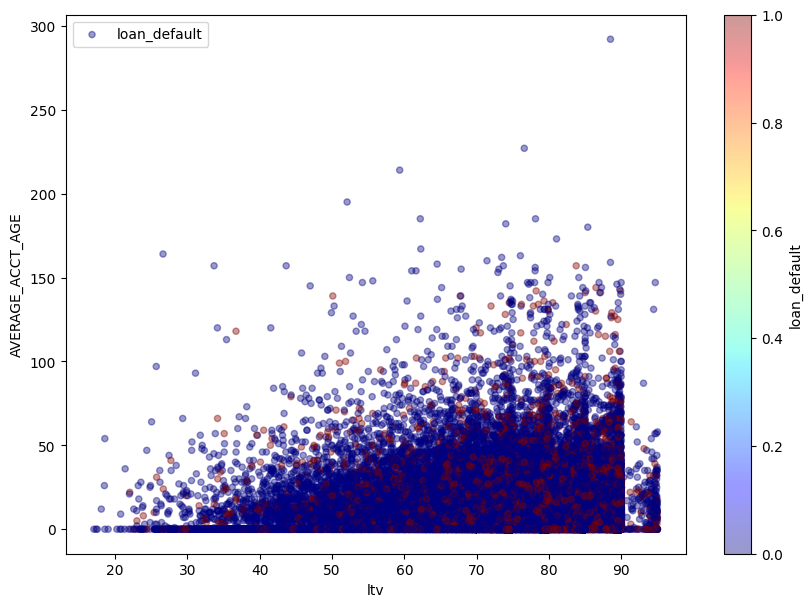

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

df_treino.plot(kind="scatter", x="ltv", y="AVERAGE_ACCT_AGE", alpha=0.4
               , label="loan_default", figsize=(10,7),
    c="loan_default", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False) #sharex=false é só pra corrigir um bug de display https://github.com/pandas-dev/pandas/issues/10611
plt.legend()

In [33]:
df_treino.select_dtypes(include='number').loc[:, df_treino.select_dtypes(include='number').nunique() > 1]

,disbursed_amount,asset_cost,ltv,Current_pincode_ID,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,idade
183779,41160.0,61551.0,69.05,227,690,3,1,0,349324.0,350000.0,350000.0,0,0,0,0.0,0.0,0.0,17871.0,0.0,1,0,8,18,0,0,32
146660,57913.0,68426.0,89.15,3346,810,2,2,0,1600.0,33990.0,18990.0,0,0,0,0.0,0.0,0.0,1899.0,0.0,1,0,4,8,1,0,28
131692,47349.0,60989.0,78.70,104,596,16,11,0,1032640.0,1408077.0,1408077.0,3,1,0,10731.0,100000.0,27540.0,0.0,0.0,1,0,34,168,0,1,-55
163376,37439.0,57484.0,67.84,943,0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,34
54765,55759.0,67000.0,84.33,1723,0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147178,52078.0,60705.0,88.95,1528,0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,42
148413,95800.0,159619.0,62.59,981,374,29,11,4,3769829.0,4346643.0,4346643.0,0,0,0,0.0,0.0,0.0,24803.0,0.0,6,4,8,39,0,0,-53
190654,54759.0,104422.0,53.63,7254,17,1,1,0,56000.0,56000.0,56000.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,23
214559,57013.0,70100.0,84.17,3042,0,0,0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,39


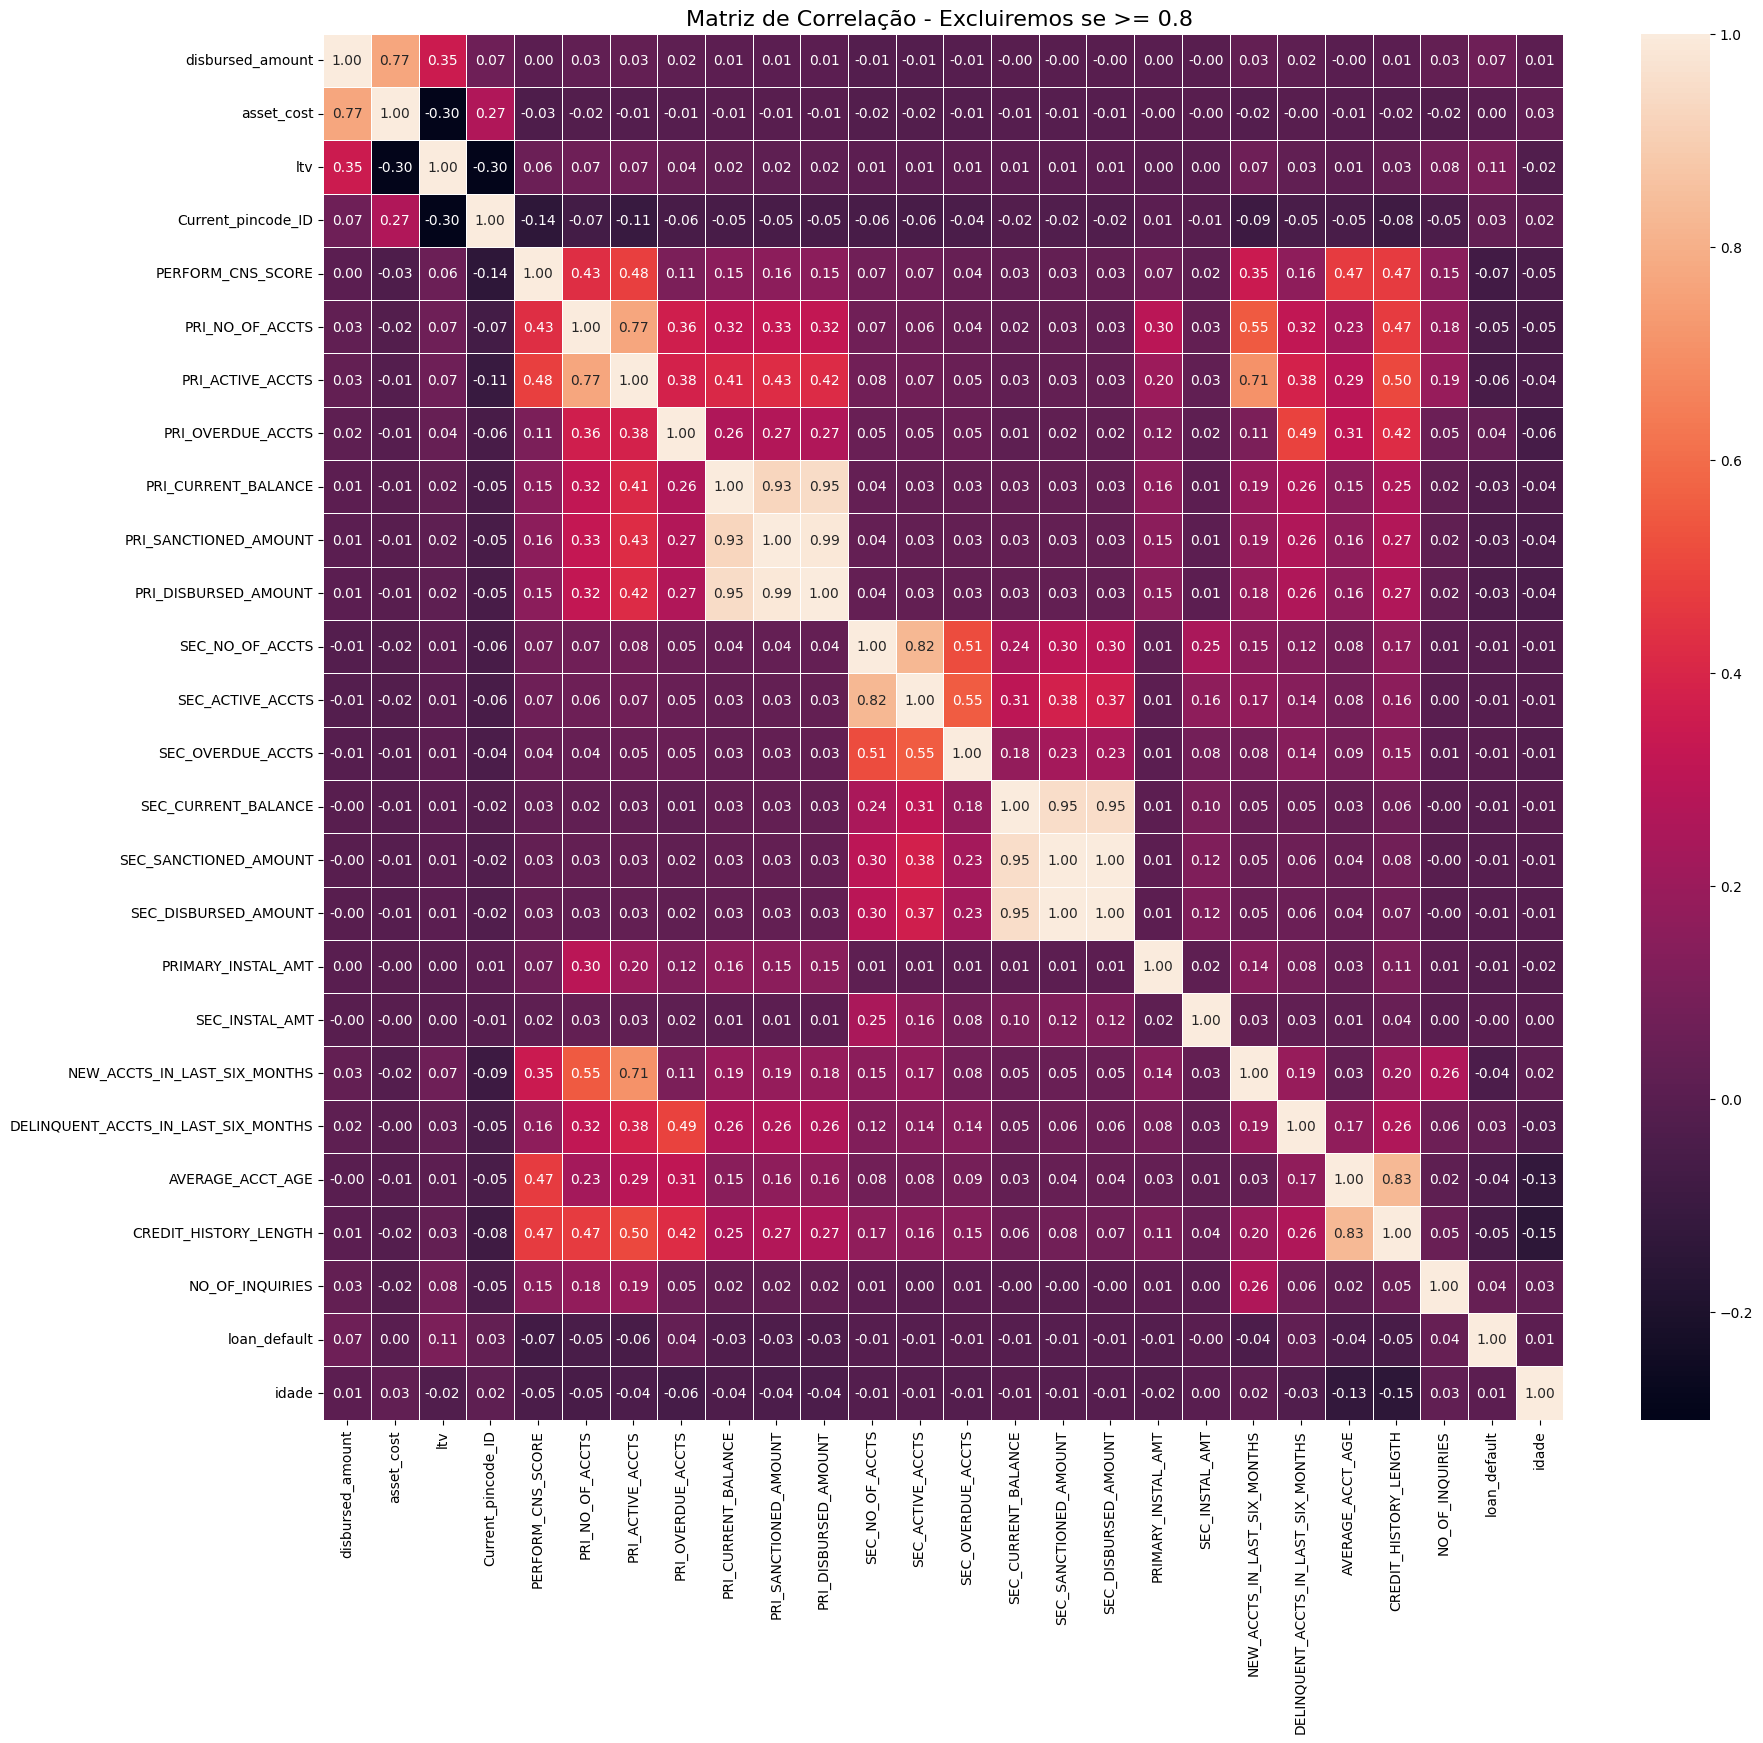

In [34]:
# corr_matrix
import seaborn as sns
corr_matrix = df_treino.select_dtypes(include='number').loc[:, df_treino.select_dtypes(include='number').nunique() > 1].corr() #.select_dtypes(include='number')
corr_matrix["loan_default"].sort_values(ascending=False)
#print(corr_matrix[corr_matrix > 0.8].dropna( how='all').dropna(axis=1, how='all'))
pd.DataFrame(round(corr_matrix,2))

# Plotar a matriz de correlação
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True,  fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação - Excluiremos se >= 0.8 ', fontsize=16)
plt.show()

In [35]:
# Excluido Variáveis com Correlação alta
list_vars_drop = ['VoterID_flag', 'AVERAGE_ACCT_AGE', 'Date_of_Birth','DisbursalDate']
df_treino      = df_treino.drop(columns=list_vars_drop)

In [36]:
df_treino.select_dtypes(include=['object']).columns

Index(['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id',
       'Employment_Type', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'PAN_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'Safra', 'seg_modelagem',
       'seg_modelagem_simples'],
      dtype='object')

# **Variáveis Selecionadas**

In [37]:
list_top_iv_vars#['VAR_NAME'].tolist()

,VAR_NAME,IV
33,disbursed_amount,5.609367e-02
35,ltv,4.913608e-02
12,PERFORM_CNS_SCORE_DESCRIPTION,4.368950e-02
29,State_ID,4.233220e-02
11,PERFORM_CNS_SCORE,3.647761e-02
32,branch_id,2.872531e-02
0,AVERAGE_ACCT_AGE,2.452626e-02
3,Current_pincode_ID,2.225227e-02
17,PRI_NO_OF_ACCTS,2.200272e-02
30,VoterID_flag,2.176621e-02


In [38]:
list_vars_model = [
    'disbursed_amount',
 'ltv',
 'PERFORM_CNS_SCORE_DESCRIPTION',
 'State_ID',
 'PERFORM_CNS_SCORE',
 'branch_id',
 #'AVERAGE_ACCT_AGE', #Correcalao
 'Current_pincode_ID',
 'PRI_NO_OF_ACCTS',
 #'VoterID_flag', #Correcalao
 'CREDIT_HISTORY_LENGTH',
 'manufacturer_id',
 'Aadhar_flag',
 'PRI_SANCTIONED_AMOUNT',
 'PRI_DISBURSED_AMOUNT',
 'PRI_CURRENT_BALANCE',
 'idade',
 'Employment_Type',
 'NO_OF_INQUIRIES',
    'asset_cost',
    'PRI_ACTIVE_ACCTS',
    'Driving_flag',
    'NEW_ACCTS_IN_LAST_SIX_MONTHS'
    ,'SEC_OVERDUE_ACCTS'

 ]

In [39]:
df_treino[list_vars_model].select_dtypes(include=['number']).columns.tolist()

['disbursed_amount',
 'ltv',
 'PERFORM_CNS_SCORE',
 'Current_pincode_ID',
 'PRI_NO_OF_ACCTS',
 'CREDIT_HISTORY_LENGTH',
 'PRI_SANCTIONED_AMOUNT',
 'PRI_DISBURSED_AMOUNT',
 'PRI_CURRENT_BALANCE',
 'idade',
 'NO_OF_INQUIRIES',
 'asset_cost',
 'PRI_ACTIVE_ACCTS',
 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
 'SEC_OVERDUE_ACCTS']

# **Pipeline de Modelagem**

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  #StandardScaler serve para fazer a reescalar das variáveis
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

#housing_num_tr = num_pipeline.fit_transform(housing_num)

# Completo
num_attribs = ['disbursed_amount',
 'ltv',
 'PERFORM_CNS_SCORE',
 'Current_pincode_ID',
 'PRI_NO_OF_ACCTS',
 'CREDIT_HISTORY_LENGTH',
 'PRI_SANCTIONED_AMOUNT',
 'PRI_DISBURSED_AMOUNT',
 'PRI_CURRENT_BALANCE',
 'idade',
 'NO_OF_INQUIRIES',
 'asset_cost',
 'PRI_ACTIVE_ACCTS',
 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
 'SEC_OVERDUE_ACCTS']

cat_attribs = ['PERFORM_CNS_SCORE_DESCRIPTION',
 'State_ID',
 'branch_id',
 'manufacturer_id',
 'Aadhar_flag',
 'Employment_Type',
 'Driving_flag']

#Este é o pipeline completo!
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), #um pipeline dentro do outro
        ("cat", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_attribs),
    ])



In [41]:
df_treino_prepared = full_pipeline.fit_transform(df_treino
                                                 #.set_index('UniqueID', inplace=False)
                                                 [list_vars_model]
                                                 )
y_df_treino = df_treino['loan_default']

df_teste_prepared  = full_pipeline.fit_transform(df_teste
                                                 #.set_index('UniqueID', inplace=False)
                                                 [list_vars_model]
                                                 )
y_df_teste = df_teste['loan_default']

In [42]:
# Verificar variabilidade
low_variance_cols = pd.DataFrame(df_treino_prepared).columns[pd.DataFrame(df_treino_prepared).nunique() <= 1]
print("Colunas com baixa variabilidade:", low_variance_cols)

Colunas com baixa variabilidade: Index([], dtype='int64')


In [43]:
int(df_treino_prepared.shape[0]*0.03)

2445

# **Modelagem**

In [44]:
# @title Otimização de Hiperparâmetros
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score



# Modelo base do LightGBM
model = lgb.LGBMClassifier(objective='binary', boosting_type='gbdt', random_state=42)

# Definindo os hiperparâmetros para o GridSearch
n_train = df_treino_prepared.shape[0]
param_grid = { # Taxa de aprendizado
    'n_estimators': [ 100, 200],       # Número de árvores
    'colsample_bytree ' : [0.9],
    'min_data_in_leaf': [int(n_train*0.01), int(n_train*0.02), int(n_train*0.03), int(n_train*0.05)]              # Profundidade máxima da árvore
}
'''
# Configurando o GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',        # Métrica de avaliação
    cv=3,                     # Validação cruzada com 3 folds
    verbose=1,
    n_jobs=-1                 # Usar todos os processadores disponíveis
)

# Executando o GridSearch
grid_search.fit(df_treino_prepared, y_df_treino)

# Resultados
print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)
print("Melhor AUC no conjunto de validação cruzada:", grid_search.best_score_)

# Avaliando no conjunto de teste
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(df_teste_prepared)[:, 1]
auc_test = roc_auc_score(y_df_teste, y_pred_proba)
print("AUC no conjunto de teste:", auc_test)'''


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


'\n# Configurando o GridSearchCV\ngrid_search = GridSearchCV(\n    estimator=model,\n    param_grid=param_grid,\n    scoring=\'roc_auc\',        # Métrica de avaliação\n    cv=3,                     # Validação cruzada com 3 folds\n    verbose=1,\n    n_jobs=-1                 # Usar todos os processadores disponíveis\n)\n\n# Executando o GridSearch\ngrid_search.fit(df_treino_prepared, y_df_treino)\n\n# Resultados\nprint("Melhores hiperparâmetros encontrados:", grid_search.best_params_)\nprint("Melhor AUC no conjunto de validação cruzada:", grid_search.best_score_)\n\n# Avaliando no conjunto de teste\nbest_model = grid_search.best_estimator_\ny_pred_proba = best_model.predict_proba(df_teste_prepared)[:, 1]\nauc_test = roc_auc_score(y_df_teste, y_pred_proba)\nprint("AUC no conjunto de teste:", auc_test)'

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=2037, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2037
[LightGBM] [Warning] min_data_in_leaf is set=2037, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2037
[LightGBM] [Info] Number of positive: 17309, number of negative: 64205
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of data points in the train set: 81514, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212344 -> initscore=-1.310854
[LightGBM] [Info] Start training from score -1.310854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=2037, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2037


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=2037, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2037


<ipython-input-45-bff9890e63a4>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = pd.DataFrame({'bin': binned, 'actual': actual}).groupby('bin').agg(
<ipython-input-45-bff9890e63a4>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = pd.DataFrame({'bin': binned, 'actual': actual}).groupby('bin').agg(


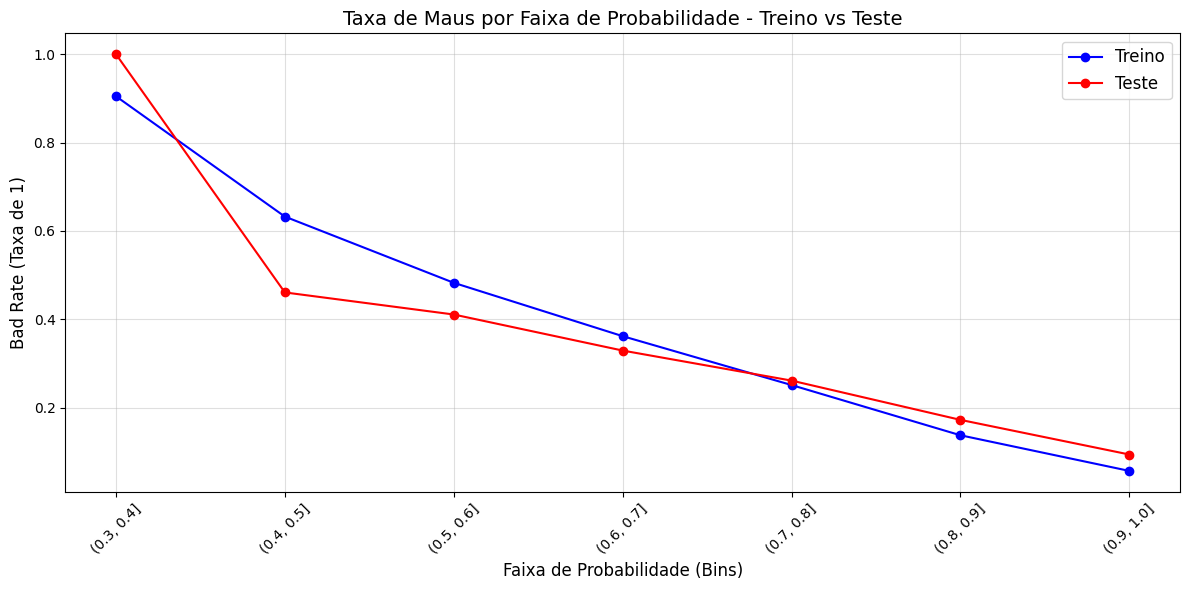

In [45]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

# Inicialização do modelo LightGBM
param_model = {
              'n_estimators'     : 110,
              'colsample_bytree': 0.90 ,
              'min_data_in_leaf' : int(n_train*0.025),
              'objective'        : 'binary' ,
              'random_state'     : 42
              }
model = lgb.LGBMClassifier(**param_model)

# Treinamento do modelo
model.fit(df_treino_prepared, y_df_treino)

# Probabilidades previstas nos conjuntos de treino e teste
probs_train = model.predict_proba(df_treino_prepared)[:, 0]  # Probabilidades da classe "1" no treino
probs_test = model.predict_proba(df_teste_prepared)[:, 0]    # Probabilidades da classe "1" no teste

# Criação de bins de probabilidade
bins = np.linspace(0, 1, 11)  # 10 bins uniformes de 0 a 1

# Função para calcular bad rate por bin
def calculate_bad_rate(probs, actual, bins):
    binned = pd.cut(probs, bins)
    bin_summary = pd.DataFrame({'bin': binned, 'actual': actual}).groupby('bin').agg(
        bad_rate=('actual', 'mean'),  # Taxa de "1" (bad rate)
        total=('actual', 'count')    # Total de observações no bin
    ).reset_index()
    return bin_summary

# Calcular bad rate para treino e teste
train_summary = calculate_bad_rate(probs_train, y_df_treino, bins)
test_summary = calculate_bad_rate(probs_test, y_df_teste, bins)

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(train_summary['bin'].astype(str), train_summary['bad_rate'], marker='o', label='Treino', color='blue')
plt.plot(test_summary['bin'].astype(str), test_summary['bad_rate'], marker='o', label='Teste', color='red')
plt.xlabel('Faixa de Probabilidade (Bins)', fontsize=12)
plt.ylabel('Bad Rate (Taxa de 1)', fontsize=12)
plt.title('Taxa de Maus por Faixa de Probabilidade - Treino vs Teste', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


# **Escora Base Para a Anaálise**

In [49]:
df_final = df.copy()

# Aplicando o pipeline de transformação e gerando as probabilidades
df_final['raw_score_bom'] = model.predict_proba(
    full_pipeline.transform(df_final[list_vars_model])
)[:, 0]
df_final.head(3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=2037, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2037


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,idade,Safra,seg_modelagem,seg_modelagem_simples,raw_score_bom
183779,418736,41160.0,61551.0,69.05,Outros,Outros,86,227,1985-08-21,Salaried,2018-01-08,Outros,Outros,1,1,0,0,0,0,690,Outros,3,1,0,349324.0,350000.0,350000.0,0,0,0,0.0,0.0,0.0,17871.0,0.0,1,0,8,18,0,0,32,201801,Treino,Treino,0.914381
146660,418590,57913.0,68426.0,89.15,5,Outros,86,3346,1990-04-26,Self employed,2018-01-08,9,Outros,1,1,0,0,0,0,810,A-Very Low Risk,2,2,0,1600.0,33990.0,18990.0,0,0,0,0.0,0.0,0.0,1899.0,0.0,1,0,4,8,1,0,28,201801,Treino,Treino,0.802891
131692,418507,47349.0,60989.0,78.70,3,Outros,45,104,2072-12-25,Self employed,2018-01-08,Outros,Outros,1,1,0,0,0,0,596,Outros,16,11,0,1032640.0,1408077.0,1408077.0,3,1,0,10731.0,100000.0,27540.0,0.0,0.0,1,0,34,168,0,1,-55,201801,Treino,Treino,0.893021


In [50]:
safras = list(df_final['Safra'].unique())
final_iv_safras = pd.DataFrame()
#IV_safras = pd.DataFrame()
for safra in safras:
  df_safra = df_final[df_final['Safra'] == safra].copy()
  #print(safra)
  #print(df_safra.shape)
  final_iv, IV = data_vars(df_safra.drop(['loan_default'] + id_vars + vars_drop, axis = 1)
                          ,df_safra.loan_default.astype(int)
                          )
  final_iv['Periodo'] = safra
  final_iv_safras = pd.concat([final_iv_safras, final_iv], ignore_index=True)
  #IV_safras = pd.concat([IV_safras, IV], ignore_index=True)
list_top_iv_vars = IV.sort_values(by='IV', ascending=False)
print(IV.sort_values(by='IV', ascending=False).iloc[:19,:])


# @title Salva Dados da Análise das Variáveis e Missing
from google.colab import files
# Salvar o DataFrame como CSV
final_iv_safras.to_csv('/content/drive/My Drive/Colab Notebooks/score_credito/Analise_IV_WOE_KS_Variaveis_Score.csv', index=False)

## Fazer o download do arquivo
#files.download('Analise_IV_WOE_KS_Variaveis.csv')

final_iv_safras



                         VAR_NAME        IV
37                  raw_score_bom  0.271605
33               disbursed_amount  0.056094
35                            ltv  0.049136
12  PERFORM_CNS_SCORE_DESCRIPTION  0.043689
29                       State_ID  0.042332
11              PERFORM_CNS_SCORE  0.036478
32                      branch_id  0.028725
0                AVERAGE_ACCT_AGE  0.024526
3              Current_pincode_ID  0.022252
17                PRI_NO_OF_ACCTS  0.022003
30                   VoterID_flag  0.021766
2           CREDIT_HISTORY_LENGTH  0.018522
36                manufacturer_id  0.015443
1                     Aadhar_flag  0.015062
19          PRI_SANCTIONED_AMOUNT  0.013807
16           PRI_DISBURSED_AMOUNT  0.013733
15            PRI_CURRENT_BALANCE  0.012214
34                          idade  0.011768
6                 Employment_Type  0.010034


,VAR_NAME,CLASSE,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV_CLASS,IV,CUM_EVENT,CUM_NON_EVENT,KS2,MAX_KS2,RANK,Periodo
0,disbursed_amount,1. [14140.0 - 47349.0],14140.0,47349.0,589,94,0.159593,495,0.840407,0.239796,0.376140,-0.450173,0.061378,0.088476,0.239796,0.376140,1.363439e-01,0.136344,1,201801
1,disbursed_amount,2. [47400.0 - 55259.0],47400.0,55259.0,558,147,0.263441,411,0.736559,0.375000,0.312310,0.182930,0.011468,0.088476,0.614796,0.688450,7.365393e-02,0.136344,2,201801
2,disbursed_amount,3. [55313.0 - 119313.0],55313.0,119313.0,561,151,0.269162,410,0.730838,0.385204,0.311550,0.212213,0.015630,0.088476,1.000000,1.000000,0.000000e+00,0.136344,3,201801
3,asset_cost,1. [38752.0 - 64121.0],38752.0,64121.0,569,121,0.212654,448,0.787346,0.308673,0.340426,-0.097912,0.003109,0.005664,0.308673,0.340426,3.175206e-02,0.031752,1,201801
4,asset_cost,2. [64165.0 - 70000.0],64165.0,70000.0,572,132,0.230769,440,0.769231,0.336735,0.334347,0.007117,0.000017,0.005664,0.645408,0.674772,2.936387e-02,0.031752,2,201801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,raw_score_bom,4. [0.7693275384814163 - 0.8046322559557172],0.769328,0.8046322559557172,702,147,0.209402,555,0.790598,0.128609,0.124161,0.035196,0.000157,0.271605,0.662292,0.458613,2.036792e-01,0.203679,4,201812
1804,raw_score_bom,5. [0.8046864292937146 - 0.8383379424870925],0.804686,0.8383379424870925,701,138,0.196862,563,0.803138,0.120735,0.125951,-0.042294,0.000221,0.271605,0.783027,0.584564,1.984634e-01,0.203679,5,201812
1805,raw_score_bom,6. [0.8383547557956881 - 0.8684408581383751],0.838355,0.8684408581383751,702,101,0.143875,601,0.856125,0.088364,0.134452,-0.419742,0.019345,0.271605,0.871391,0.719016,1.523754e-01,0.203679,6,201812
1806,raw_score_bom,7. [0.8684509211900913 - 0.8998476402595621],0.868451,0.8998476402595621,701,76,0.108417,625,0.891583,0.066492,0.139821,-0.743286,0.054505,0.271605,0.937883,0.858837,7.904608e-02,0.203679,7,201812
